In [1]:
from keras.models import load_model

# loaded_model = load_model("/home/abhi/MP/VGG")

2024-03-31 11:19:40.918512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-31 11:19:40.918813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model



2024-04-01 20:04:18.461576: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-01 20:04:18.461939: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Set up directory paths
current_directory = os.getcwd()
train_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/english_dataset1/Train")
test_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/english_dataset1/Test")

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200, 200),
                                                    batch_size=64,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(200, 200),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 1743 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [9]:
import tensorflow as tf

In [9]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 1))
        self.cnn2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')

        self.flatten = tf.keras.layers.Flatten()

        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.cnn1(inputs)
        x = self.cnn2(x)
        x = self.cnn3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

In [10]:
custom_cnn_model = MyModel()

In [11]:
# cnn_model = load_model('/home/aman/Personal/majorproject/cnn1.h5')
cnn_model=custom_cnn_model.load_weights("/home/abhi/MP/saved_model/cnn.h5")

ValueError: Unable to load weights saved in HDF5 format into a subclassed Model which has not created its variables yet. Call the Model first, then load the weights.

In [21]:
cnn_model = load_model('/home/abhi/MP/saved_model/custom_cnn_model.h5')

ValueError: Unable to create a Keras model from this SavedModel. This SavedModel was created with `tf.saved_model.save`, and lacks the Keras metadata.Please save your Keras model by calling `model.save`or `tf.keras.models.save_model`.

In [22]:

# Load the SavedModel
cnn_model = tf.saved_model.load('/home/abhi/MP/saved_model/custom_cnn_model.h5')



FileNotFoundError: Op type not registered 'DisableCopyOnRead' in binary running on LAPTOP-7IEP2F7U. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing (e.g.) `tf.contrib.resampler` should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [13]:
import tensorflow as tf

# Read the file content
file_content = tf.io.read_file("/home/abhi/MP/saved_model/cnn_saved_model.pb")

# Parse the file content
graph_def = tf.compat.v1.GraphDef()
graph_def.ParseFromString(file_content.numpy())

# Import the graph definition into a new TensorFlow graph
with tf.Graph().as_default() as graph:
    tf.import_graph_def(graph_def, name="")

# Now you can use the graph for inference or other operations


DecodeError: Error parsing message with type 'tensorflow.GraphDef'

In [2]:
import cv2
import numpy as np

In [6]:
image = cv2.imread('/home/abhi/MP/abhi/3.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/home/abhi/MP/abhi/3_gray.jpg', gray_image)

True

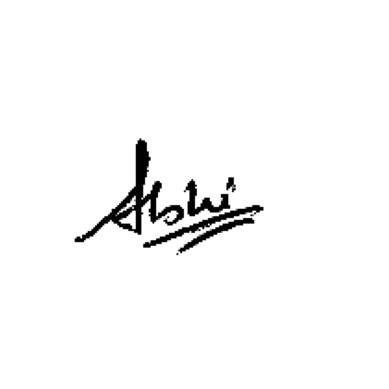

Similarity score: 99.45148229598999%
Valid Signature


In [9]:
import cv2
import matplotlib.pyplot as plt

image_path = '/home/abhi/MP/binarized_image.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (200, 200))
image = image / 255.0  

input_image = image.reshape((1,) + image.shape)

predictions = loaded_model.predict(input_image)

plt.imshow(image)
plt.axis('off')
plt.show()

print("Similarity score: {}%".format(predictions[0][0]*100))
if predictions >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")


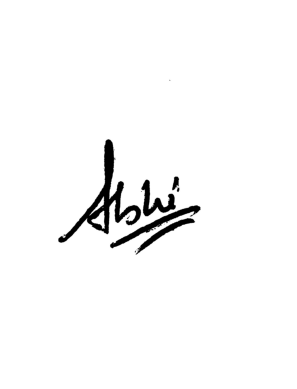

Similarity score: 99.45148229598999%
Valid Signature


In [10]:
image_path = '/home/abhi/MP/binarized_image.jpg'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



img = cv2.imread('/home/abhi/MP/binarized_image.jpg')
img = cv2.resize(img, (200, 200))
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = loaded_model.predict(img)
print("Similarity score: {}%".format(pred[0][0]*100))
if pred >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")

In [5]:
import cv2

# Load the image
image = cv2.imread("/home/abhi/MP/E3.png", cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Save the original and binarized images
# cv2.imwrite("original_image.jpg", image)
cv2.imwrite("/home/abhi/MP/Binarized_img/E3.jpg", binary_image)

True

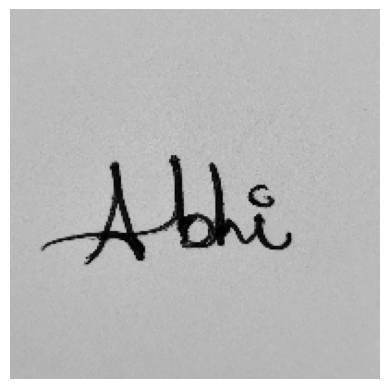

Similarity score: 39.17694091796875%
Invalid Signature


In [13]:
import cv2
import matplotlib.pyplot as plt

image_path = '/home/abhi/MP/abhi/2_gray.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (200, 200))
image = image / 255.0  

input_image = image.reshape((1,) + image.shape)

predictions = loaded_model.predict(input_image)

plt.imshow(image)
plt.axis('off')
plt.show()

print("Similarity score: {}%".format(predictions[0][0]*100))
if predictions >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")

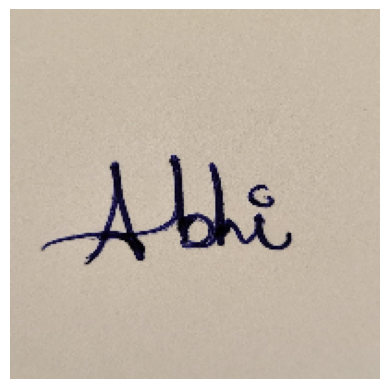

Similarity score: 49.45868253707886%
Invalid Signature


In [6]:
import cv2
import matplotlib.pyplot as plt

image_path = '/home/abhi/MP/abhi/2.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (200, 200))
image = image / 255.0  

input_image = image.reshape((1,) + image.shape)

predictions = loaded_model.predict(input_image)

plt.imshow(image)
plt.axis('off')
plt.show()

print("Similarity score: {}%".format(predictions[0][0]*100))
if predictions >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")

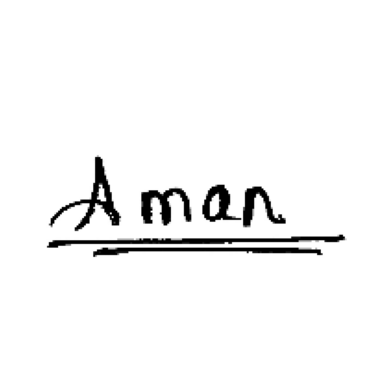

Similarity score: 88.0846619606018%
Valid Signature


In [5]:
import cv2
import matplotlib.pyplot as plt

image_path = '/home/abhi/MP/Binarized_img/aman_real_binarized.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (200, 200))
image = image / 255.0  

input_image = image.reshape((1,) + image.shape)

predictions = loaded_model.predict(input_image)

plt.imshow(image)
plt.axis('off')
plt.show()

print("Similarity score: {}%".format(predictions[0][0]*100))
if predictions >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")


In [14]:
image = cv2.imread('/home/abhi/MP/test/P2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/home/abhi/MP/test/P2_g.jpg', gray_image)

True

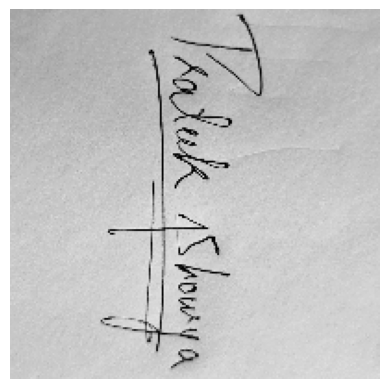

Similarity score: 4.265427589416504%
Invalid Signature


In [15]:
import cv2
import matplotlib.pyplot as plt

image_path = '/home/abhi/MP/test/P2_g.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (200, 200))
image = image / 255.0  

input_image = image.reshape((1,) + image.shape)

predictions = loaded_model.predict(input_image)

plt.imshow(image)
plt.axis('off')
plt.show()

print("Similarity score: {}%".format(predictions[0][0]*100))
if predictions >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")
